In [ ]:
# import LIB
import numpy as np
import time
import multiprocessing as mp
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Generates predefined matrix 3x3 for testing
def populate(size, predefined=False):
    if predefined and size == 3:
        # Predefined 3x3 matrices for testing
        A = np.array([[1, 2, 3],
                      [4, 5, 6],
                      [7, 8, 9]])
        B = np.array([[9, 8, 7],
                      [6, 5, 4],
                      [3, 2, 1]])
    else:
        A = np.random.rand(size, size)
        B = np.random.rand(size, size)
    return A, B

# random size and print size
# def populate(size):
#     return np.random.rand(size, size), np.random.rand(size, size)

def print_matrix(C):
    for row in C:
        print(' '.join(f'{x:.2f}' for x in row))

# functions to measure execution time.
def time_execution(func):
    def wrapper(*args, **kwargs):
        start_time = time.time()
        result = func(*args, **kwargs)
        end_time = time.time()
        execution_time = end_time - start_time
        return result, execution_time
    return wrapper

# Sequential computation
@time_execution
def sequential_multiply(A, B):
    return np.dot(A, B)

def compute_row(args):
    A, B, row = args
    return np.dot(A[row], B)

# Parallel computation at row level
@time_execution
def parallel_row_multiply(A, B, num_processes):
    with mp.Pool(processes=num_processes) as pool:
        args = [(A, B, row) for row in range(A.shape[0])]
        C = np.array(pool.map(compute_row, args))
    return C

def compute_element(args):
    A, B, i, j = args
    return np.dot(A[i], B[:, j])

# Parallel computation at element level
@time_execution
def parallel_element_multiply(A, B, num_processes):
    shape = A.shape
    with mp.Pool(processes=num_processes) as pool:
        args = [(A, B, i, j) for i in range(shape[0]) for j in range(shape[1])]
        result = pool.map(compute_element, args)
    return np.array(result).reshape(shape)

In [ ]:
# run code caculator matrix and print file
def run_experiments():
    sizes = [10, 100, 1000]  # Adjust based on your system's capabilities
    process_counts = [2, 4, 8]  # Adjust based on your CPU core count
    results = []

    for size in sizes:
        print(f"\nRunning experiments for size {size}x{size}")
        A, B = populate(size)

        # Sequential
        _, time_taken = sequential_multiply(A, B)
        results.append({
            'Size': size,
            'Method': 'Sequential',
            'Processes': 1,
            'Time': time_taken
        })

        # Parallel Row
        for num_processes in process_counts:
            _, time_taken = parallel_row_multiply(A, B, num_processes)
            results.append({
                'Size': size,
                'Method': 'Parallel Row',
                'Processes': num_processes,
                'Time': time_taken
            })

        # Parallel Element
        for num_processes in process_counts:
            _, time_taken = parallel_element_multiply(A, B, num_processes)
            results.append({
                'Size': size,
                'Method': 'Parallel Element',
                'Processes': num_processes,
                'Time': time_taken
            })

    df = pd.DataFrame(results)
    df.to_csv('matrix_multiplication_results.csv', index=False)
    print("Results saved to matrix_multiplication_results.csv")
    return df

In [ ]:
# Use predefined 3x3 matrices for testing
if __name__ == "__main__":
    size = 3
    A, B = populate(size, predefined=True)

    print("Matrix A:")
    print_matrix(A)

    print("Matrix B:")
    print_matrix(B)

    print("\nResult Matrix (Sequential Multiplication):")
    C, time_taken = sequential_multiply(A, B)
    print_matrix(C)
    print(f"Sequential execution time: {time_taken:.6f} seconds")

    print("\nResult Matrix (Parallel Row-Level Multiplication):")
    C, time_taken = parallel_row_multiply(A, B, num_processes=2)
    print_matrix(C)
    print(f"Parallel row-level execution time: {time_taken:.6f} seconds")

    print("\nResult Matrix (Parallel Element-Level Multiplication):")
    C, time_taken = parallel_element_multiply(A, B, num_processes=2)
    print_matrix(C)
    print(f"Parallel element-level execution time: {time_taken:.6f} seconds")

Matrix A:
1.00 2.00 3.00
4.00 5.00 6.00
7.00 8.00 9.00
Matrix B:
9.00 8.00 7.00
6.00 5.00 4.00
3.00 2.00 1.00

Result Matrix (Sequential Multiplication):
30.00 24.00 18.00
84.00 69.00 54.00
138.00 114.00 90.00
Sequential execution time: 0.000037 seconds

Result Matrix (Parallel Row-Level Multiplication):
30.00 24.00 18.00
84.00 69.00 54.00
138.00 114.00 90.00
Parallel row-level execution time: 0.041142 seconds

Result Matrix (Parallel Element-Level Multiplication):
30.00 24.00 18.00
84.00 69.00 54.00
138.00 114.00 90.00
Parallel element-level execution time: 0.027070 seconds



Running experiments for size 10x10

Running experiments for size 100x100

Running experiments for size 1000x1000
Results saved to matrix_multiplication_results.csv
Performance plot saved as matrix_multiplication_performance.png


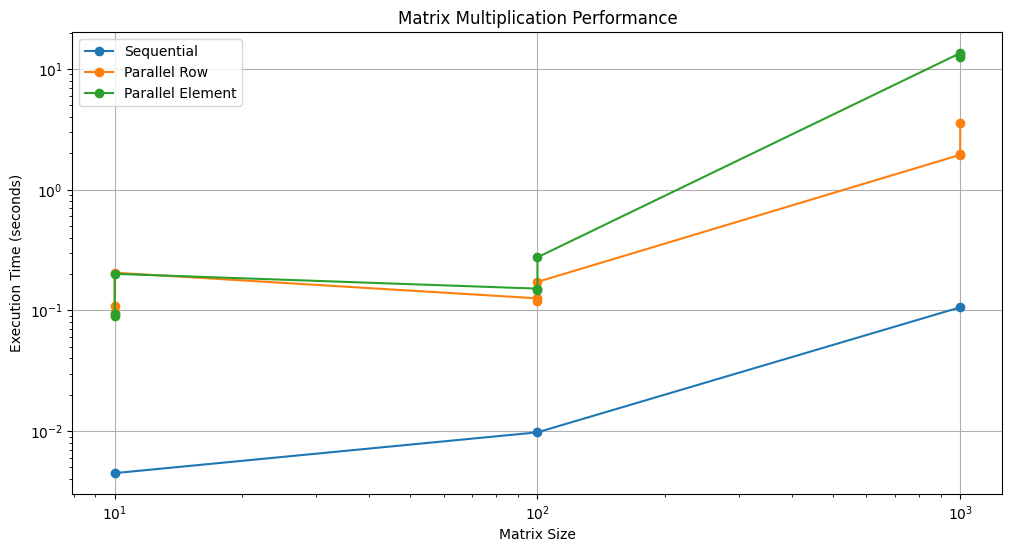

In [ ]:
def plot_results(df):
    plt.figure(figsize=(12, 6))
    for method in df['Method'].unique():
        data = df[df['Method'] == method]
        plt.plot(data['Size'], data['Time'], marker='o', label=f"{method}")

    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('Matrix Size')
    plt.ylabel('Execution Time (seconds)')
    plt.title('Matrix Multiplication Performance')
    plt.legend()
    plt.grid(True)
    plt.savefig('matrix_multiplication_performance.png')
    print("Performance plot saved as matrix_multiplication_performance.png")

if __name__ == "__main__":
    results_df = run_experiments()
    plot_results(results_df)